<a href="https://colab.research.google.com/github/econ105/AI/blob/main/coursehousingpriceforecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install the required libraries
!pip install pandas openpyxl
from google.colab import files
uploaded = files.upload()

Saving HousePricePrediction.xlsx to HousePricePrediction.xlsx


# New Section

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_excel("/content/HousePricePrediction.xlsx")

# Printing first 5 records of the dataset
print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [ ]:
obj = (dataset.dtypes == 'object')#we categorize the features depending on their datatype (int, float, object) and then calculate the number of them.
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 6
Float variables: 3


<Axes: >

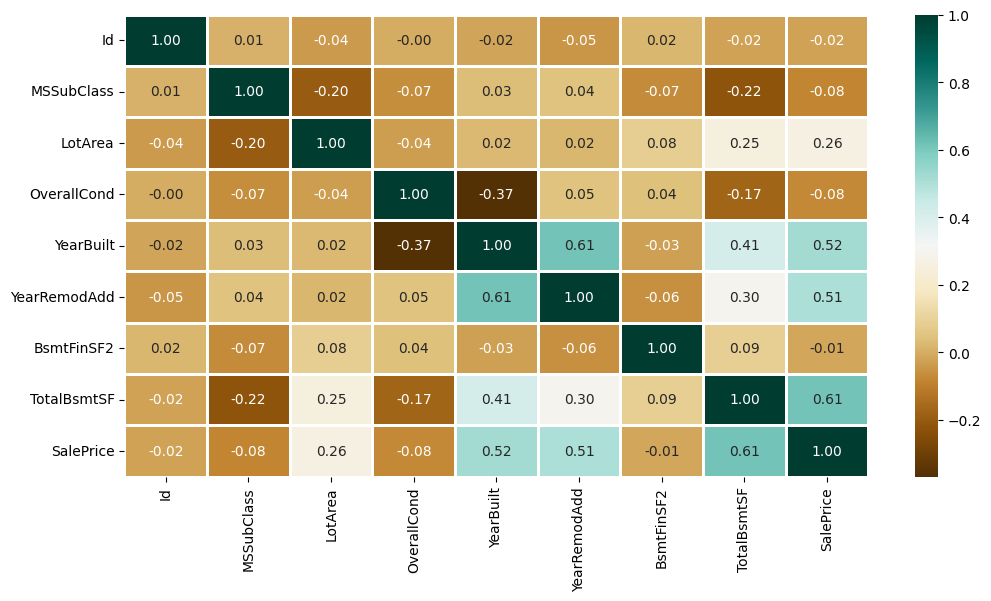

In [ ]:
#Explorary data analysis refers to the deep analysis of data so as to discover
#different patterns and spot anomalies. Before making inferences from data it is essential to examine all your variables.
# Select only numerical features for correlation analysis
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))#Make a heatmap using seaborn library
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

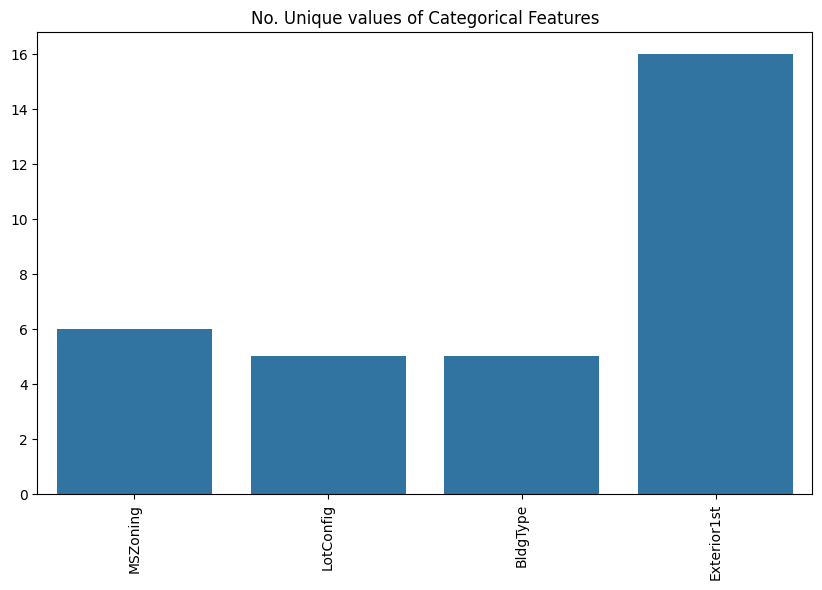

In [ ]:
unique_values = []#To analyze the different categorical features. Let’s draw the barplot
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

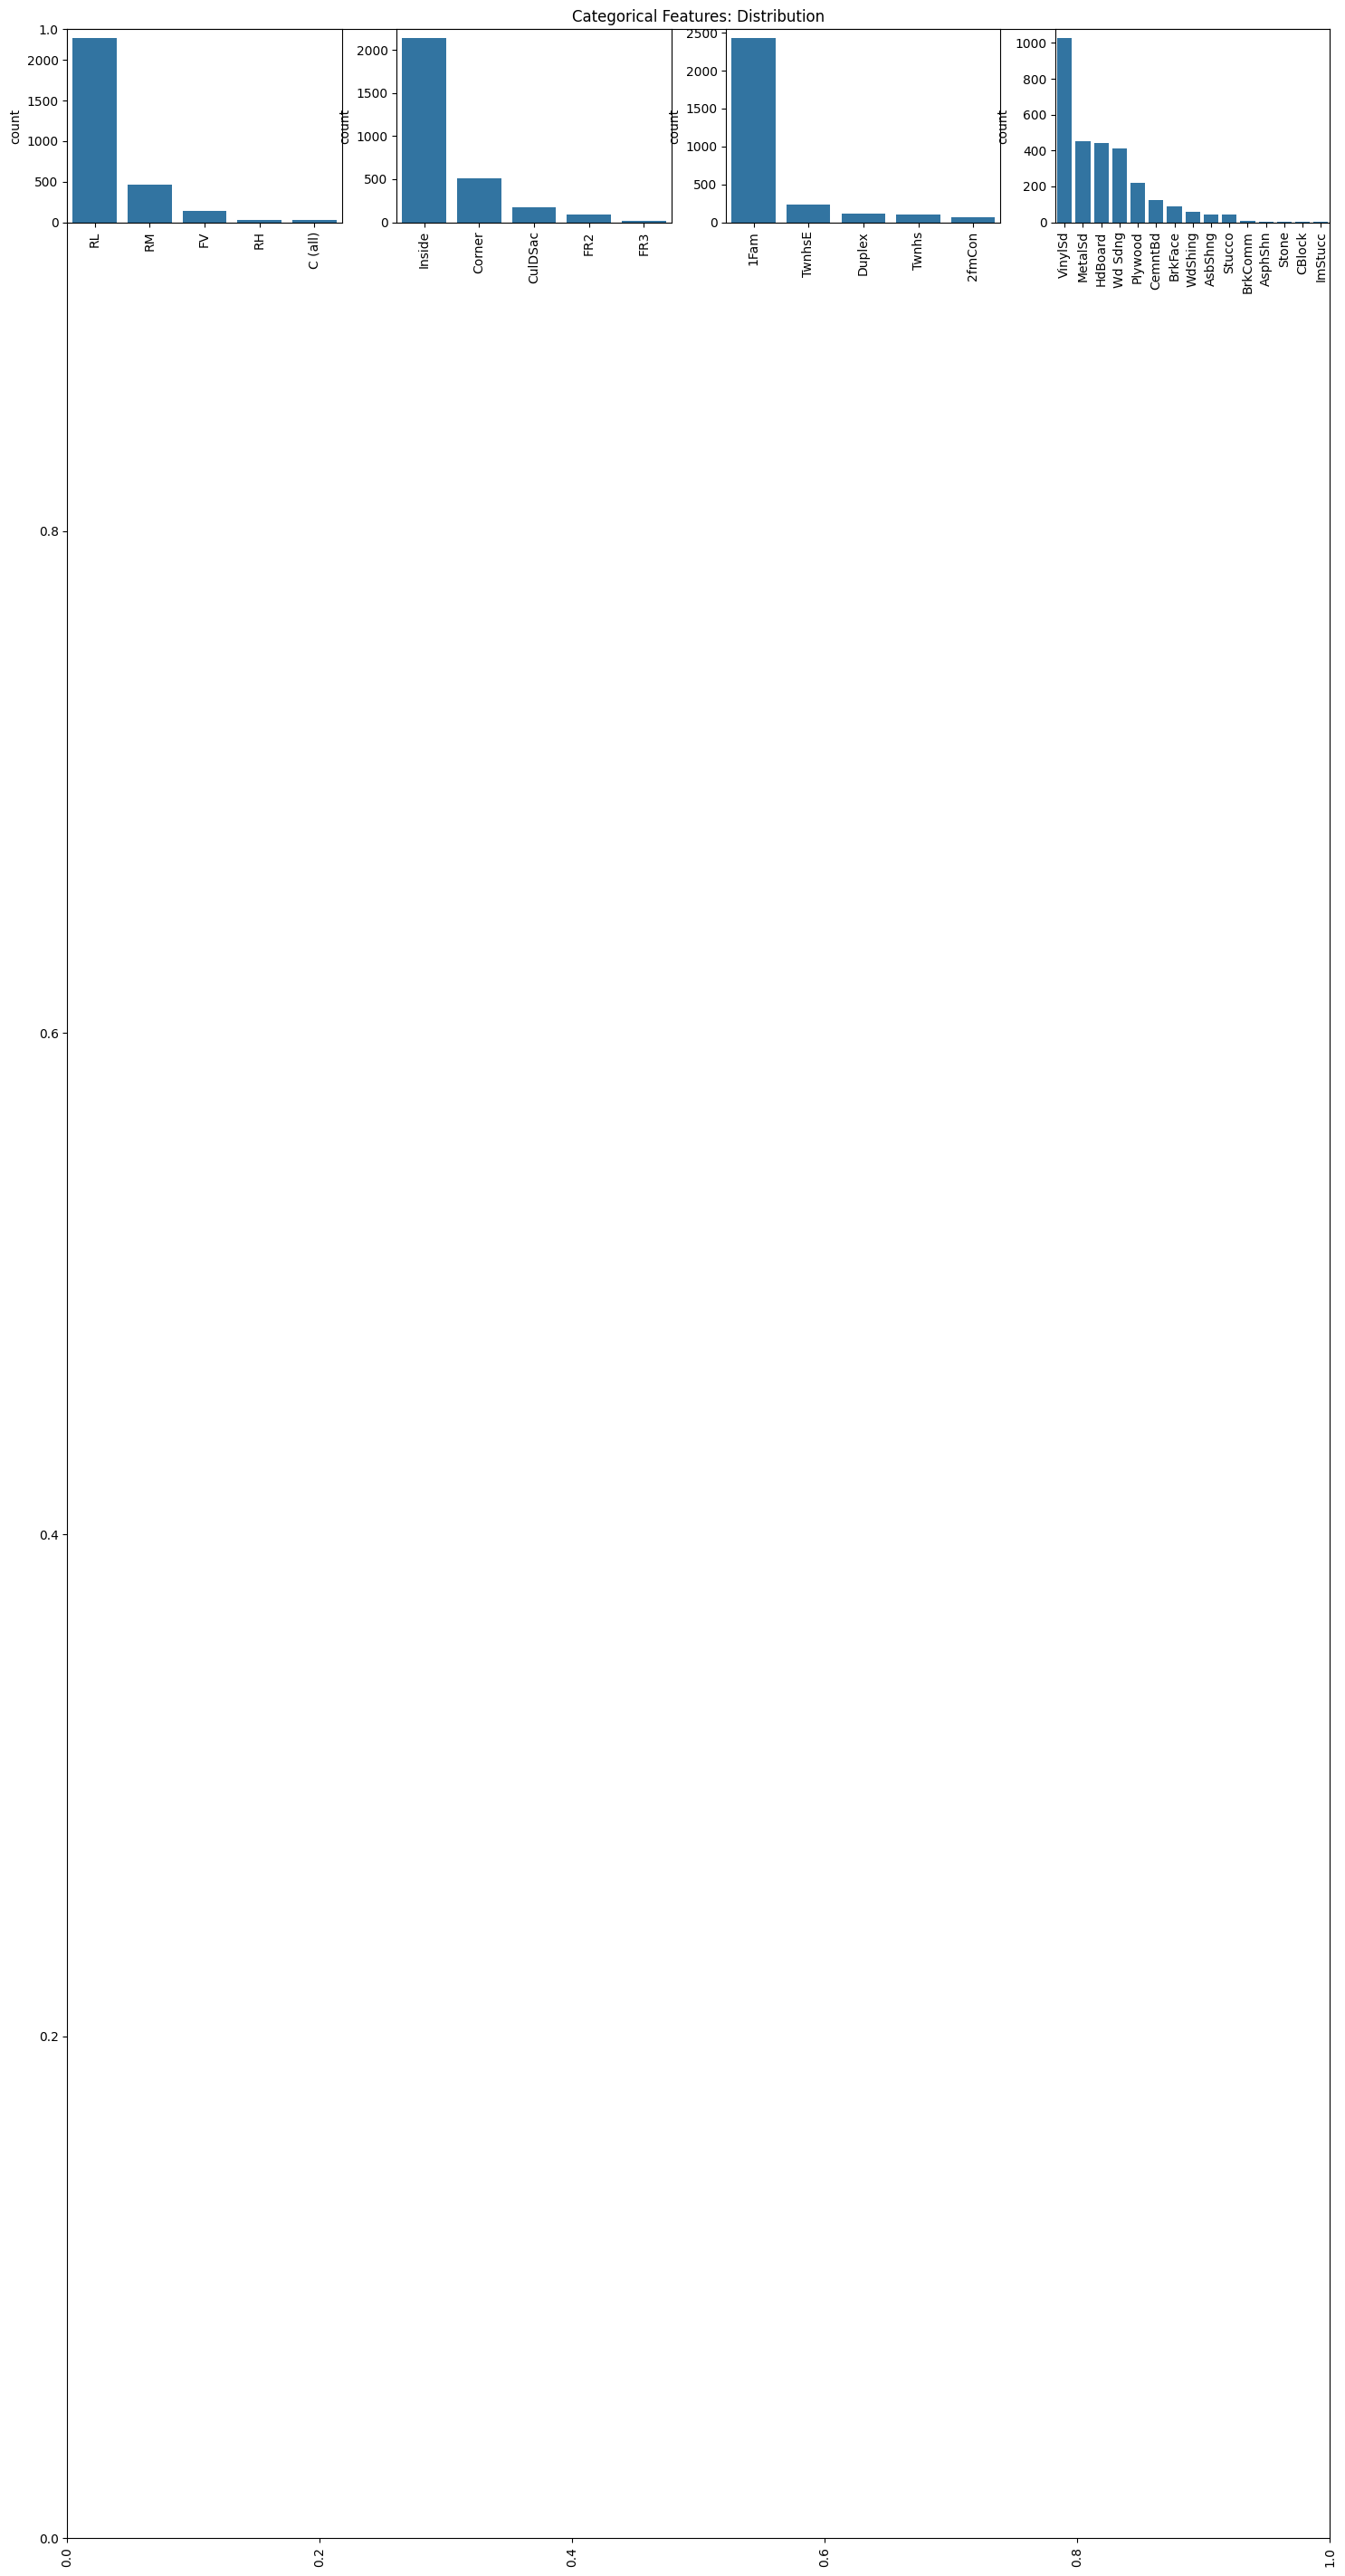

In [ ]:
#The plot shows that Exterior1st has around 16 unique categories and other features have around  6 unique categories.
#To findout the actual count of each category we can plot the bargraph of each four features separately.
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [ ]:
#Data Cleaning is the way to improvise the data or remove incorrect, corrupted or irrelevant data.

#As in our dataset, there are some columns that are not important and irrelevant for the model training.
#So, we can drop that column before training, like 'Id' is not our concern
dataset.drop(['Id'],
             axis=1,
             inplace=True)

In [ ]:
#Replacing SalePrice empty values with their mean values to make the data distribution symmetric.
dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean())

In [ ]:
#Drop records with null values (as the empty records are very less).
new_dataset = dataset.dropna()

In [ ]:
#Checking features which have null values in the new dataframe (if there are still any).
new_dataset.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0
BsmtFinSF2,0


In [ ]:
#One hot Encoding is the best way to convert categorical data into binary vectors.
#we can easily convert object data into int. So for that, firstly we have to collect all the features which have the object datatype.
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [ ]:
#Then once we have a list of all the features. We can apply OneHotEncoding to the whole list
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))

OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols)

df_final = pd.concat([new_dataset.drop(object_cols, axis=1), OH_cols], axis=1)

In [ ]:
#Splitting Dataset into Training and Testing
# X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
# Support vector Machine can be used for both regression and classification model.
#It finds the hyperplane in the n-dimensional plane
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(Y_pred)
print(mean_absolute_percentage_error(Y_valid, Y_pred))
#the model is trained on X_train and Y_train, and predictions are made on X_valid, which implies that X_valid is a separate validation set. Therefore, the results printed (i.e., predictions and the mean absolute percentage error) are out-of-sample forecasting results. This means the model's performance is evaluated on data it has not encountered before during training, providing a more realistic assessment of its predictive capabilities.

[180921.09850714 180921.35738777 180921.29540461 180921.20048317
 180921.19644362 180921.14905108 180920.97800817 180921.10670542
 180921.35151811 180921.20565425 180921.13615807 180921.26274349
 180921.08931957 180921.04500705 180921.1231947  180921.08756777
 180921.05541178 180921.11737426 180921.08869279 180921.17897294
 180921.09031817 180921.07501577 180921.22869939 180921.06257641
 180920.98279614 180921.15321437 180921.07323332 180921.11851755
 180921.12488598 180921.0702809  180921.13571046 180921.13581043
 180921.15562755 180921.14047217 180921.12728804 180921.11187783
 180921.04808565 180921.09885007 180921.17878136 180921.16873418
 180921.2110207  180921.28433599 180921.34361881 180921.04635779
 180921.17154865 180921.21063907 180921.13157243 180920.97788085
 180921.17342403 180921.14320022 180921.17801826 180921.10606047
 180921.0975797  180921.11393065 180921.09150343 180921.08059727
 180921.07823405 180921.28743668 180921.05658237 180921.14491251
 180921.19264383 180921.1

In [ ]:
#Random Forest is an ensemble technique that can be used for both regression and classification tasks.
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)
print(Y_pred)
print(mean_absolute_percentage_error(Y_valid, Y_pred))

[187568.47835616 339276.35876712 165268.47835616 181329.07630137
 214818.47835616 180921.19589041 136324.69794521 144208.47835616
 180708.47835616 229846.35876712 161592.71753425 226432.11958904
 178394.83712329 125412.11958904 190475.59794521 156345.59794521
 144376.35876712 179398.47835616 245537.31958904 177853.47835616
 184692.71753425 167936.95671233 188718.47835616 157452.71753425
 145110.59794521 181492.11958904 164644.83712329 148610.59794521
 166070.59794521 159644.83712329 164868.47835616 180684.83712329
 177029.07630137 168730.59794521 172320.59794521 189058.47835616
 146648.47835616 161488.19794521 137584.23917808 185668.47835616
 206718.47835616 243929.2989726  239644.83712329  91961.85876712
 191889.75876712 208236.95671233 188242.71753425 122922.57835616
 170802.71753425 176137.93127854 219780.67835616 186068.47835616
 179631.23917808 140133.47835616 185892.71753425 173161.95671233
 171369.07630137 219252.71753425 158410.57979909 180921.19589041
 207230.59794521 147838.8

In [ ]:
#Linear Regression predicts the final output-dependent value based on the given independent features.
#Like, here we have to predict SalePrice depending on features like MSSubClass, YearBuilt, BldgType, Exterior1st etc
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(Y_pred)
print(mean_absolute_percentage_error(Y_valid, Y_pred))

[191650.15923449 256694.21204008 172701.86041706 178271.40635751
 206419.73613526 197732.89101834 122841.48375805 157878.58934738
 191291.77887932 204804.03308353 150243.64027564 219384.08152954
 175255.50575308 146897.11420032 199206.87801954 140385.69033295
 168183.44447516 163859.73646194 199489.97467243 197189.64221705
 196128.98519652 133933.9044786  213384.66385958 171491.85738482
 134813.81633663 155413.33744835 147306.70226195 172544.46498721
 162993.16873967 149133.18652125 165985.90539426 190830.5097074
 163121.19310168 194180.0272962  173858.91795552 196437.34882538
 141050.11569808 164048.62478897 170097.87353521 168791.86980326
 213867.76779934 227566.00767484 225968.6660771  141556.62431201
 200123.25857303 221255.82922142 219628.05092849 112066.64524959
 170881.54038786 195695.22225925 199297.32301991 194250.64094596
 125567.52706621 153150.46411961 197129.20194131 152353.39846162
 135830.20477894 222158.33887991 182830.5698671  199591.81857295
 206995.28102922 167071.63

In [ ]:
#Conclusion
#Clearly, SVM model is giving better accuracy as the mean absolute error is the least among all the other regressor models.